# Importing Libraries

In [66]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [98]:
df = pd.read_csv('.\games.csv')
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.500000e+12,1.500000e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.500000e+12,1.500000e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.500000e+12,1.500000e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.500000e+12,1.500000e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.500000e+12,1.500000e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [24]:
df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [73]:
df.info()
df.describe()
# df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  bool   
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(2), float64(2), int64(4), object(8)
memory usage: 2.2+ MB


,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483208e+12,1.483208e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.831972e+10,2.831967e+10,33.570585,291.253376,291.036126,2.797152
min,1.376770e+12,1.376770e+12,1.000000,784.000000,789.000000,1.000000
25%,1.479640e+12,1.479642e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.497030e+12,1.497030e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.500708e+12,1.500708e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504490e+12,1.504490e+12,349.000000,2700.000000,2723.000000,28.000000


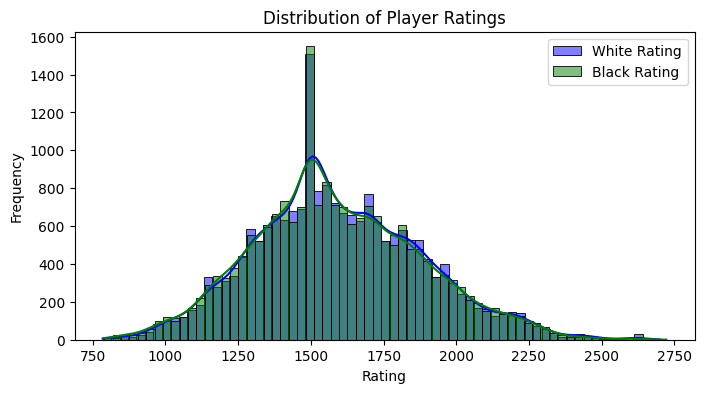

In [93]:
plt.figure(figsize=(8, 4))
sns.histplot(df['white_rating'], kde=True, color='blue', label='White Rating')
sns.histplot(df['black_rating'], kde=True, color='green', label='Black Rating')
plt.legend()
plt.title('Distribution of Player Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

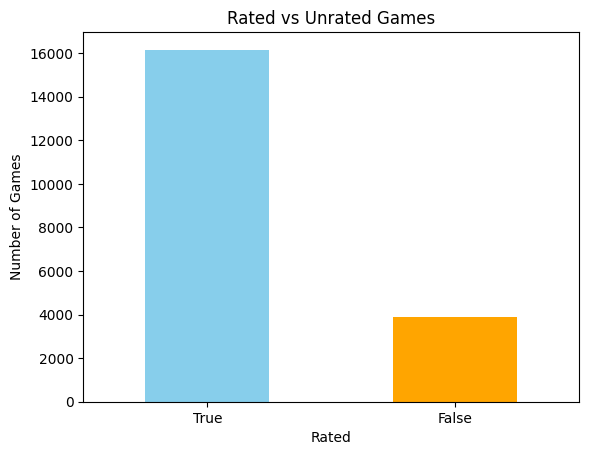

In [101]:
rated_counts = df['rated'].value_counts()

# Plotting the rated vs unrated games
rated_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Rated vs Unrated Games')
plt.xlabel('Rated')
plt.ylabel('Number of Games')
plt.xticks(rotation=0)
plt.show()

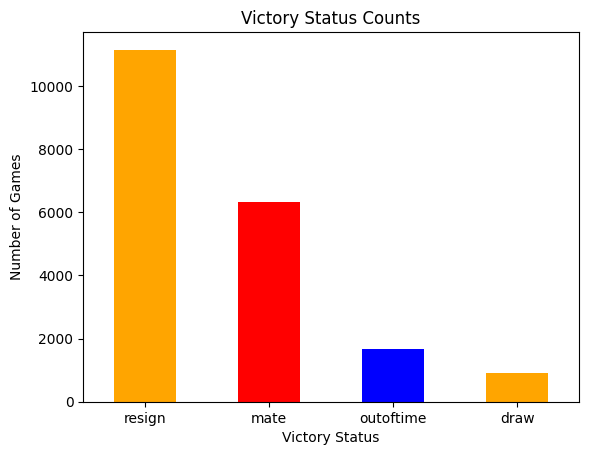

In [91]:
victory_counts = df['victory_status'].value_counts()

# Plotting victory statuses
victory_counts.plot(kind='bar', color={'blue','orange', 'red'})
plt.title('Victory Status Counts')
plt.xlabel('Victory Status')
plt.ylabel('Number of Games')
plt.xticks(rotation=0)
plt.show()

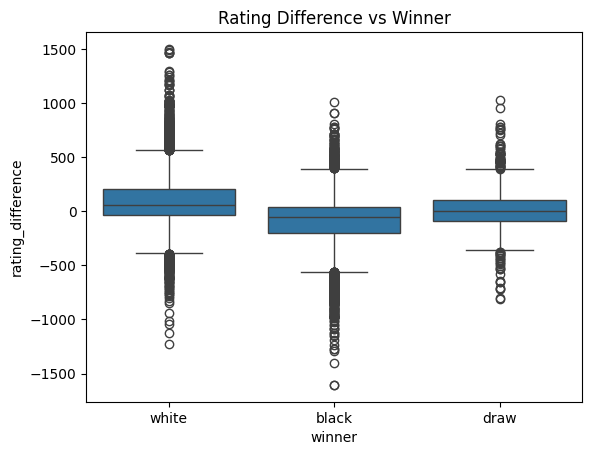

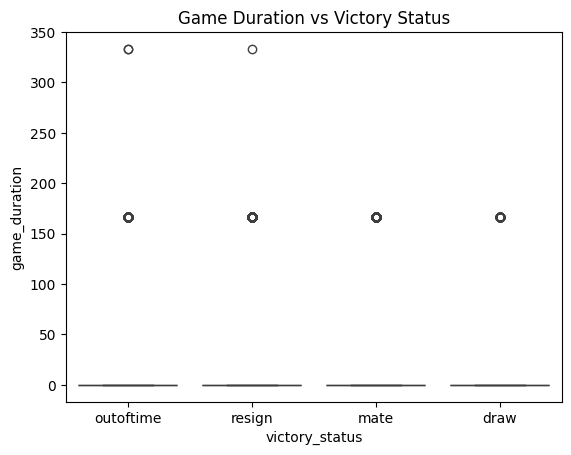

In [125]:
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')
df['last_move_at'] = pd.to_datetime(df['last_move_at'], unit='ms')

# Calculate game duration in minutes
df['game_duration'] = (df['last_move_at'] - df['created_at'] ).dt.total_seconds() / 60
df_filtered = df[df['game_duration'] <= 1000]

# Plotting game duration vs victory status
sns.boxplot(x='victory_status', y='game_duration', data=df_filtered)
plt.title('Game Duration vs Victory Status')
plt.show()

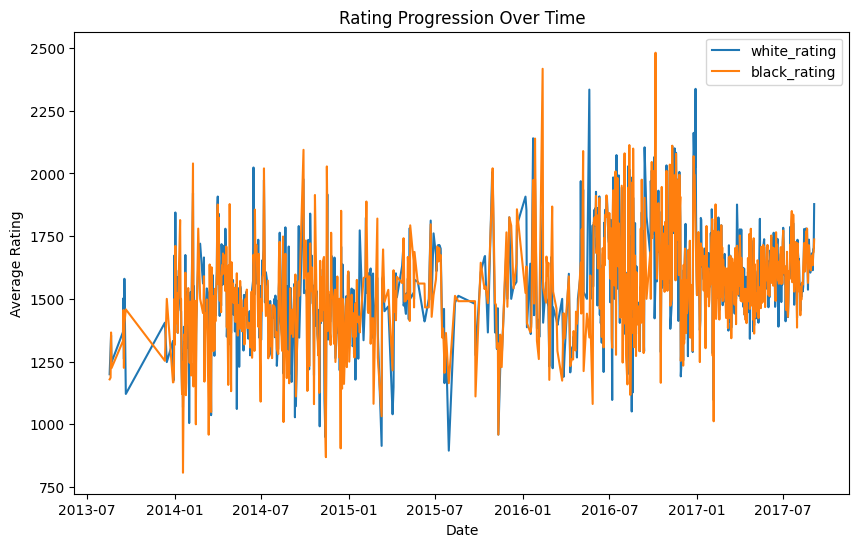

In [109]:
df['created_at_date'] = df['created_at'].dt.date

# Group by date and calculate mean ratings
rating_over_time = df.groupby('created_at_date')[['white_rating', 'black_rating']].mean()

# Plot the rating progression over time
rating_over_time.plot(figsize=(10, 6))
plt.title('Rating Progression Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.show()

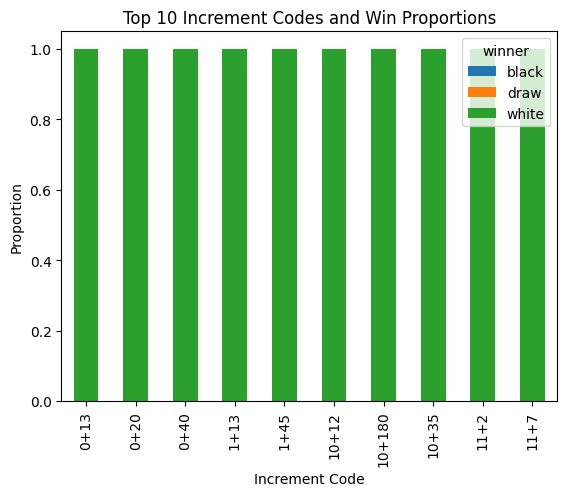

In [110]:
# Count of winners by increment code
increment_wins = df.groupby('increment_code')['winner'].value_counts(normalize=True).unstack()

# Plot top 10 most common increment codes with win ratios
top_increments = increment_wins.fillna(0).nlargest(10, 'white')

top_increments.plot(kind='bar', stacked=True)
plt.title('Top 10 Increment Codes and Win Proportions')
plt.ylabel('Proportion')
plt.xlabel('Increment Code')
plt.show()


In [113]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Prepare data
X = df[['white_rating', 'black_rating', 'opening_ply', 'turns', 'game_duration']]
y = df['winner'].apply(lambda x: 1 if x == 'white' else 0)  # Convert 'winner' to binary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


ModuleNotFoundError: No module named 'sklearn'

In [106]:
opening_wins = df.groupby('opening_name')['winner'].value_counts(normalize=True).unstack()
opening_wins

# # Plot top 10 most common openings with win ratios
# top_openings = opening_wins.fillna(0).nlargest(10, 'white')

# top_openings.plot(kind='bar', stacked=True)
# plt.title('Top 10 Openings and Win Proportions')
# plt.ylabel('Proportion')
# plt.xlabel('Opening')
# plt.show()

winner,black,draw,white
opening_name,,,
Alekhine Defense,0.456522,0.043478,0.500000
Alekhine Defense #2,0.333333,0.333333,0.333333
Alekhine Defense #3,1.000000,NaN,NaN
Alekhine Defense: Balogh Variation,1.000000,NaN,NaN
Alekhine Defense: Brooklyn Variation,NaN,NaN,1.000000
...,...,...,...
Zukertort Opening: Slav Invitation,0.181818,NaN,0.818182
Zukertort Opening: Tennison Gambit,0.404762,0.071429,0.523810
Zukertort Opening: The Walrus,NaN,NaN,1.000000


In [58]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.500000e+12,1.500000e+12,13,outoftime,True,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.500000e+12,1.500000e+12,16,resign,False,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.500000e+12,1.500000e+12,61,mate,True,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.500000e+12,1.500000e+12,61,mate,True,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.500000e+12,1.500000e+12,95,mate,True,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [30]:
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483208e+12,1.483208e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.831972e+10,2.831967e+10,33.570585,291.253376,291.036126,2.797152
min,1.376770e+12,1.376770e+12,1.000000,784.000000,789.000000,1.000000
25%,1.479640e+12,1.479642e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.497030e+12,1.497030e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.500708e+12,1.500708e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504490e+12,1.504490e+12,349.000000,2700.000000,2723.000000,28.000000


In [40]:
below_1500 = df[df['white_rating'] < 1500]
below_1500.shape

(7364, 16)

In [42]:
above_1500 = df[df['white_rating'] > 1500]
above_1500.shape

(11882, 16)

In [45]:
below_1500['winner'].value_counts()

winner
False    3844
True     3520
Name: count, dtype: int64

In [46]:
above_1500['winner'].value_counts()

winner
True     7012
False    4870
Name: count, dtype: int64

In [48]:
above_2000 = df[df['white_rating'] > 2000]
above_2000.shape

(1794, 16)

In [51]:
above_2000['winner'].value_counts()

winner
True     1228
False     566
Name: count, dtype: int64

In [53]:
below_1000 = df[df['white_rating'] < 1000]
below_1000.shape

(247, 16)

In [57]:
below_1000['winner'].value_counts()

winner
False    179
True      68
Name: count, dtype: int64